In [1]:
pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
crime = pd.read_csv(r"C:\Users\Mohan Patil\OneDrive\Desktop\Datasets\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
# Normalize data using standard scalar fit transform to dataset
crime_norms=StandardScaler().fit_transform(crime)
crime_norms

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## Dendrogram

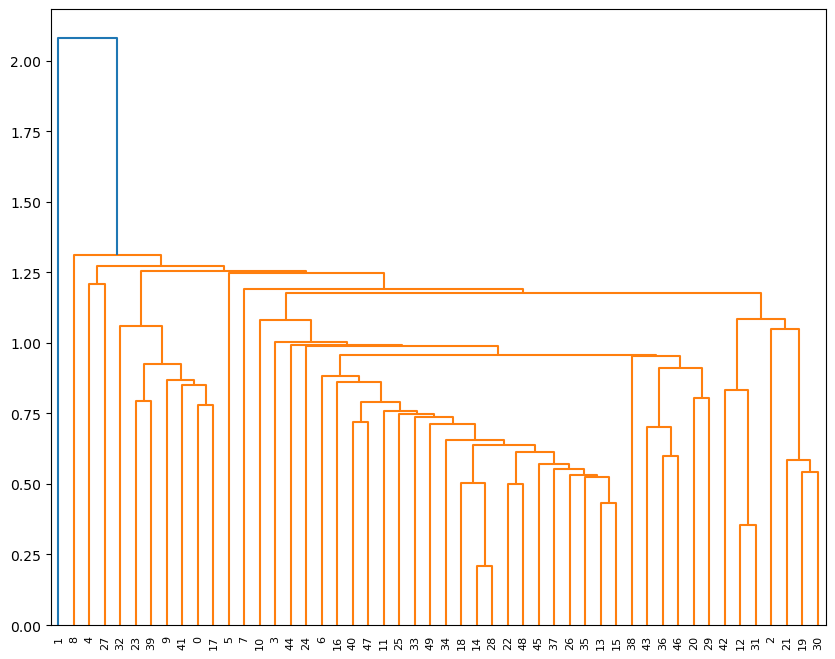

In [7]:
#Create Dendrograms single 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrograms=sch.dendrogram(sch.linkage(crime_norms,'single'))

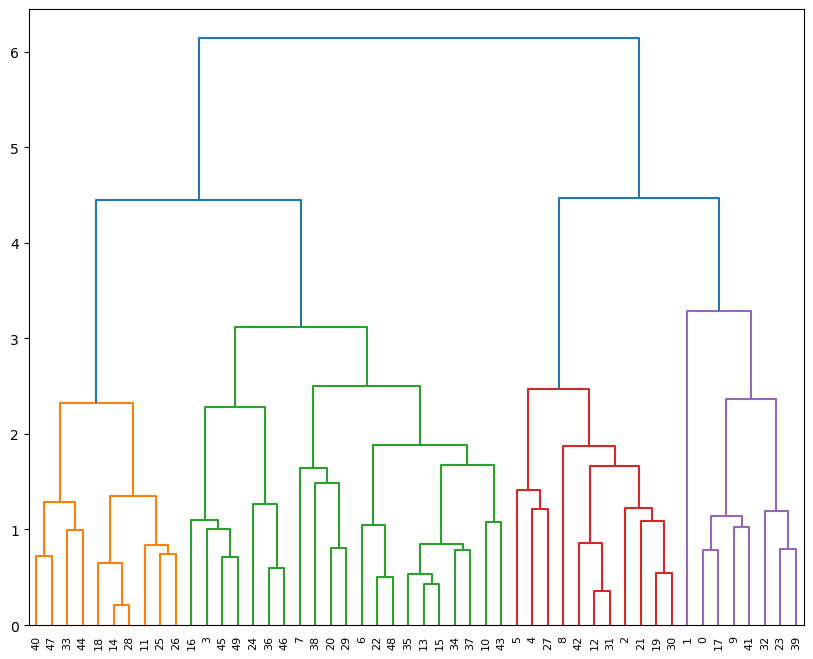

In [25]:
#Create Dendrograms complete
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrograms=sch.dendrogram(sch.linkage(crime_norms,'complete'))

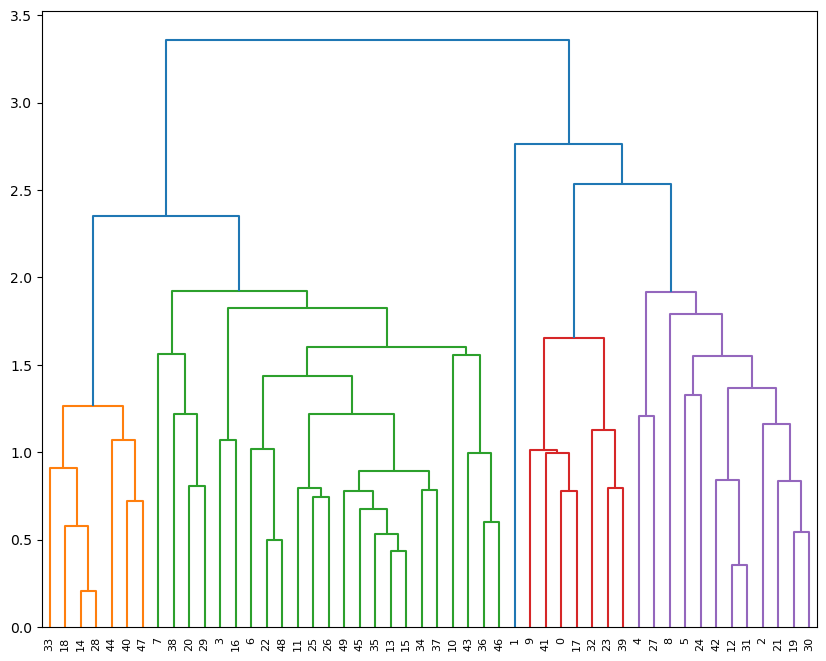

In [26]:
#Create Dendrograms average
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrograms=sch.dendrogram(sch.linkage(crime_norms,'average'))

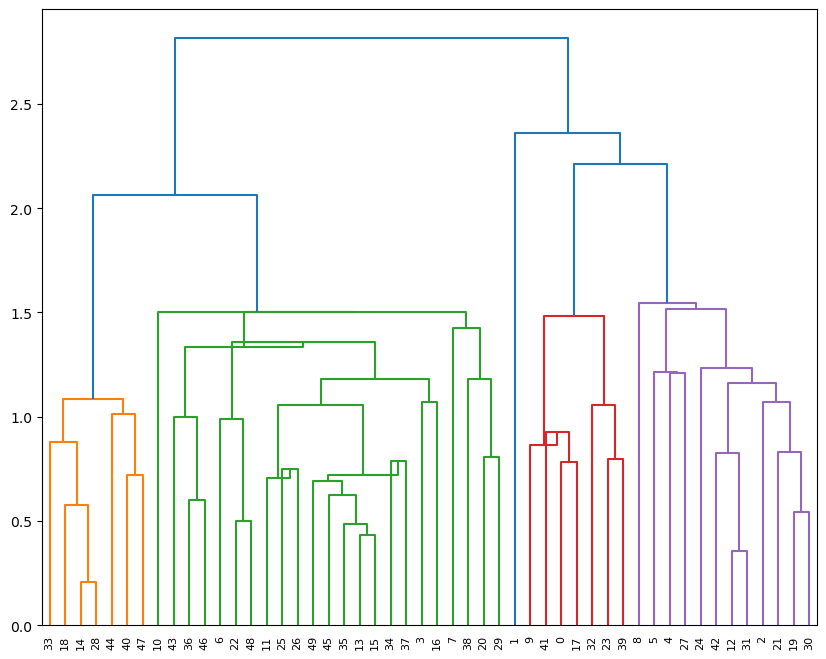

In [27]:
#Create Dendrograms Centroid
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrograms=sch.dendrogram(sch.linkage(crime_norms,'centroid'))

In [8]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 

In [9]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range(1,13):
    kmean=KMeans(n_clusters=i,random_state=2)
    kmean.fit(crime_norms)
    wcss.append(kmean.inertia_)

C:\Users\Mohan Patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


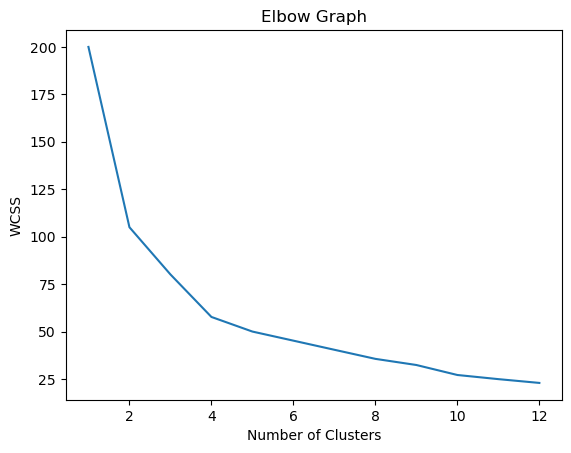

In [10]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,13),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Build Cluster algorithm using K=5

In [11]:
cluster_5=KMeans(5,random_state=30).fit(crime_norms)
cluster_5

KMeans(n_clusters=5, random_state=30)

In [12]:
cluster_5.labels_

array([1, 2, 2, 0, 2, 2, 4, 0, 2, 1, 4, 3, 2, 0, 3, 0, 0, 1, 3, 2, 4, 2,
       3, 1, 0, 0, 0, 2, 3, 4, 2, 2, 1, 3, 0, 0, 0, 0, 4, 1, 3, 1, 2, 4,
       3, 0, 0, 3, 3, 0])

In [13]:
# Assign cluster to the dataset
crime_5=crime.copy()
crime_5['cluster_5']=cluster_5.labels_
crime_5

,Murder,Assault,UrbanPop,Rape,cluster_5
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,4
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


In [14]:
# Compute the centroids for K=5 clusters with 13 variables
cluster_5.cluster_centers_

array([[-0.23996529, -0.33082798, -0.0702524 , -0.1343076 ],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [-0.76257011, -0.53850456,  1.25337729, -0.53550482]])

In [15]:
# Group data by Clusters (K=4)
crime_5.groupby('cluster_5').agg(['mean']).reset_index()

,cluster_5,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.753333,143.466667,64.533333,19.986667
1,1,14.671429,251.285714,54.285714,21.685714
2,2,10.966667,264.000000,76.500000,33.608333
3,3,2.680000,70.100000,51.000000,10.910000
4,4,4.500000,126.333333,83.500000,16.266667


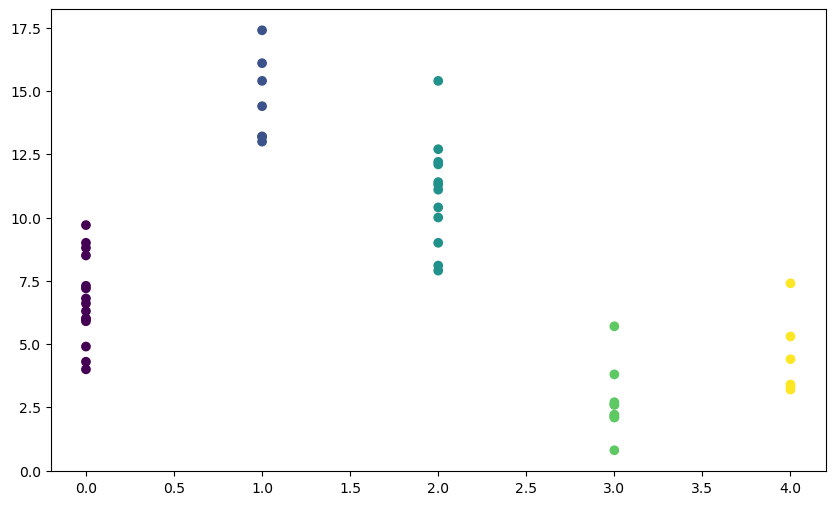

In [16]:
# Plot Clusters
plt.figure(figsize=(10,6))
plt.scatter(crime_5['cluster_5'],crime_5['Murder'],c=cluster_5.labels_)

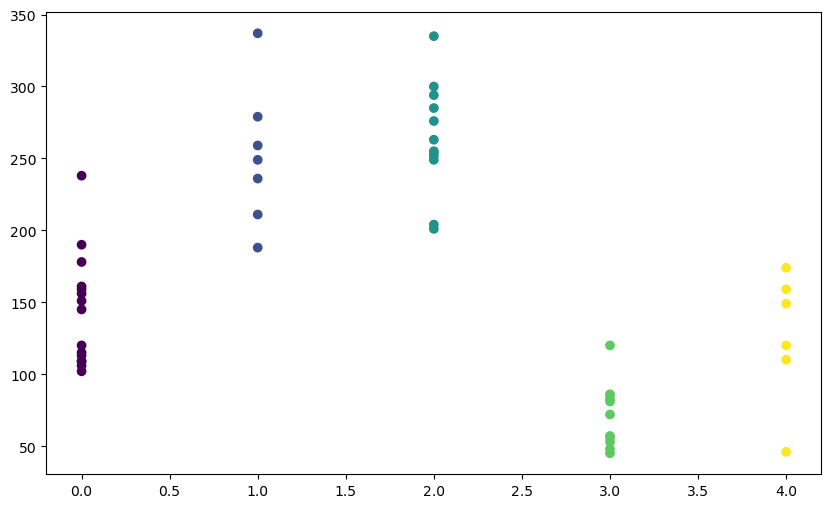

In [17]:
# Plot Clusters
plt.figure(figsize=(10,6))
plt.scatter(crime_5['cluster_5'],crime_5['Assault'],c=cluster_5.labels_)

## Build Cluster algorithm using K=6

In [18]:
cluster_6=KMeans(6,random_state=30).fit(crime_norms)
cluster_6

KMeans(n_clusters=6, random_state=30)

In [19]:
cluster_6.labels_

array([4, 5, 1, 3, 1, 1, 0, 3, 1, 4, 0, 2, 1, 3, 2, 3, 3, 4, 2, 1, 0, 1,
       2, 4, 3, 2, 3, 1, 2, 0, 1, 1, 4, 2, 3, 3, 3, 3, 0, 4, 2, 4, 1, 0,
       2, 3, 3, 2, 2, 3])

In [20]:
# Assign cluster to the dataset
crime_6=crime.copy()
crime_6['cluster_6']=cluster_6.labels_
crime_6

,Murder,Assault,UrbanPop,Rape,cluster_6
0,13.2,236,58,21.2,4
1,10.0,263,48,44.5,5
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,3
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,4


In [21]:
# Compute the centroids for K=6 clusters with 13 variables
cluster_6.cluster_centers_

array([[-0.76257011, -0.53850456,  1.25337729, -0.53550482],
       [ 0.75759426,  1.13128272,  0.94567938,  1.22798509],
       [-1.11467476, -1.17725513, -1.00201665, -1.05938813],
       [-0.22748551, -0.30098674, -0.01276108, -0.10667779],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392]])

In [22]:
# Group data by Clusters (K=6)
crime_6.groupby('cluster_6').agg(['mean']).reset_index()

,cluster_6,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.500000,126.333333,83.500000,16.266667
1,1,11.054545,264.090909,79.090909,32.618182
2,2,2.981818,73.636364,51.181818,11.409091
3,3,6.807143,145.928571,65.357143,20.242857
4,4,14.671429,251.285714,54.285714,21.685714
5,5,10.000000,263.000000,48.000000,44.500000


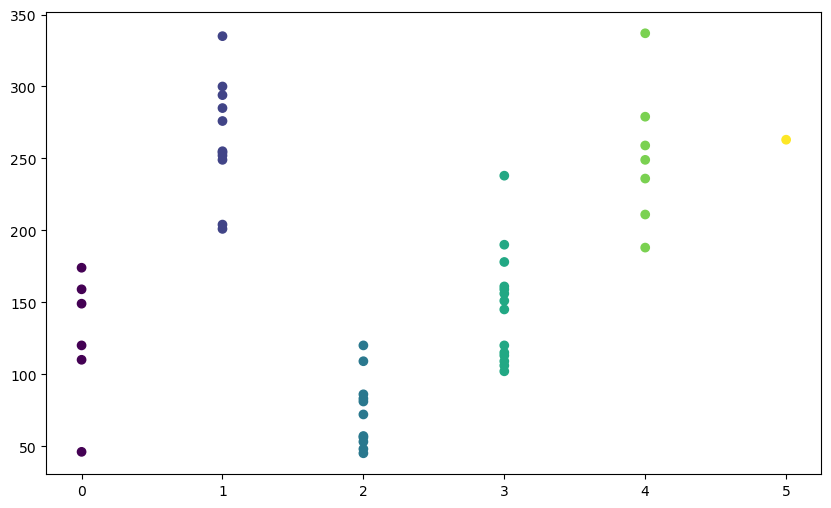

In [23]:
# Plot Clusters
plt.figure(figsize=(10,6))
plt.scatter(crime_6['cluster_6'],crime_6['Assault'],c=cluster_6.labels_)

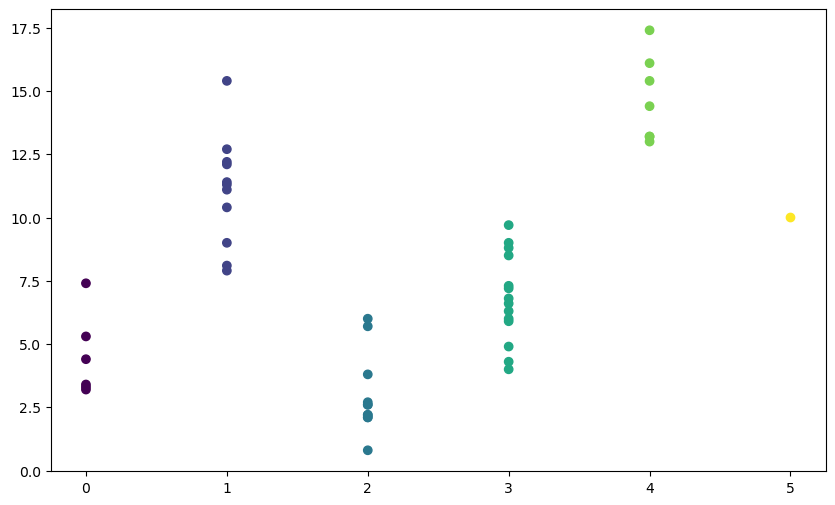

In [24]:
# Plot Clusters
plt.figure(figsize=(10,6))
plt.scatter(crime_6['cluster_6'],crime_6['Murder'],c=cluster_6.labels_)